In [1]:
from PIL import Image
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt

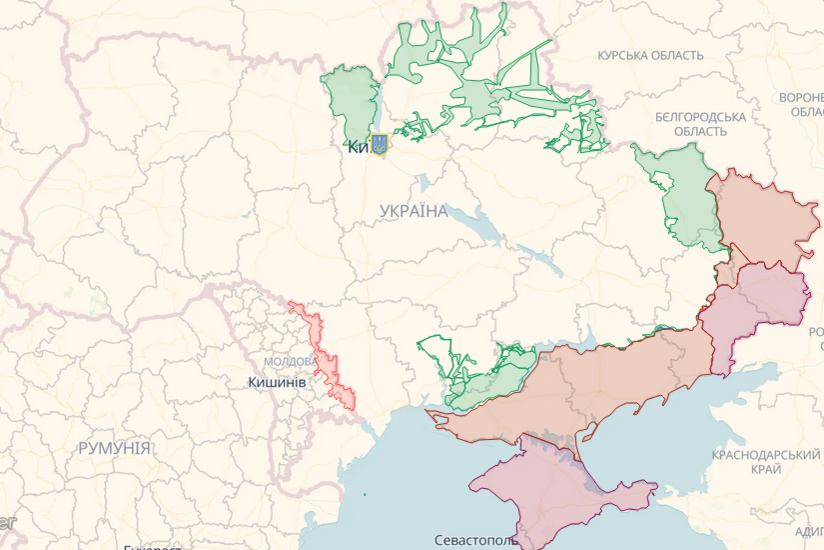

In [2]:
img = Image.open('images/screenshot_1689215168.5979602.png')
display(img)

In [3]:
img_cv = np.array(img) 
img_cv_cp = img_cv.copy()
if img_cv.shape[2] == 4:
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGBA2RGB)

In [4]:
# FILTRO CANAL DE COLOR

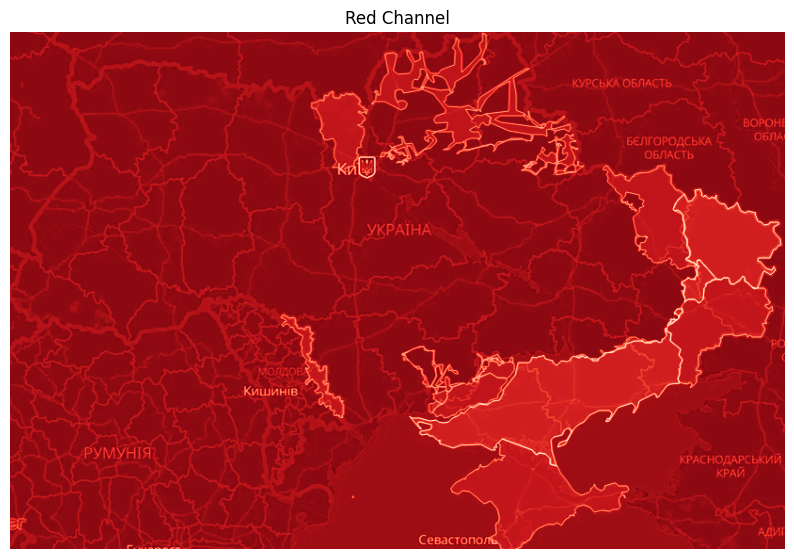

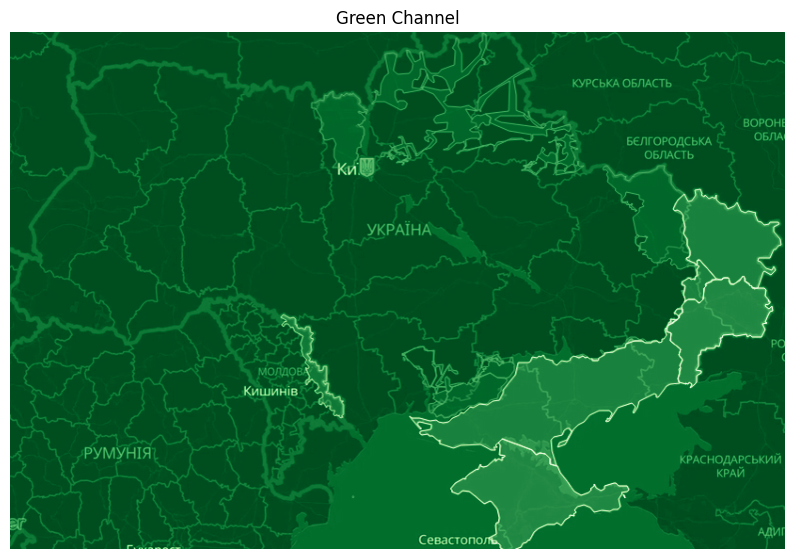

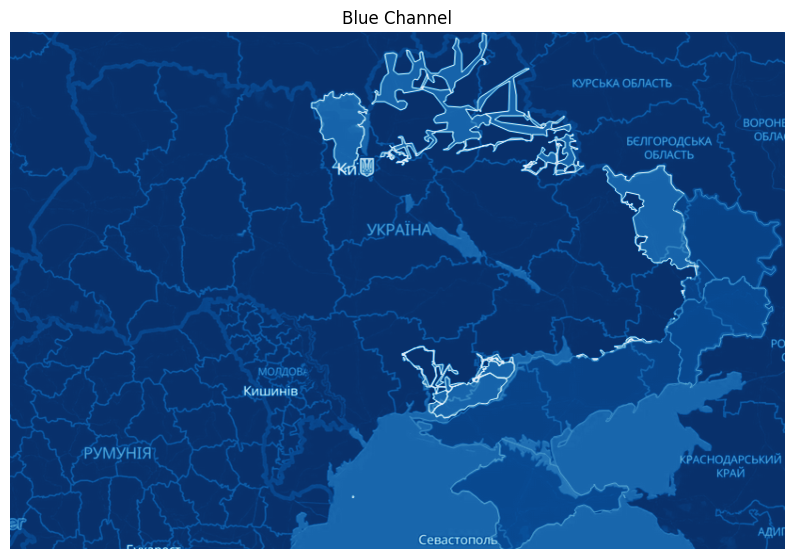

In [5]:
# Separar los canales de color
b, g, r = cv2.split(img_cv)

# Mostrar cada canal por separado
plt.figure(figsize=(10, 10))

plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')
plt.show()


In [6]:
# FILTRO DE UMBRAL

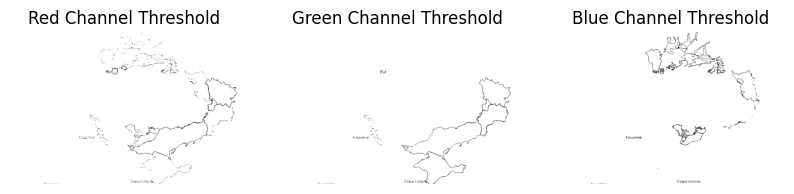

In [7]:
# Definir un umbral
thresh = 128

# Aplicar el umbral a cada canal
_, b_thresh = cv2.threshold(b, thresh, 255, cv2.THRESH_BINARY)
_, g_thresh = cv2.threshold(g, thresh, 255, cv2.THRESH_BINARY)
_, r_thresh = cv2.threshold(r, thresh, 255, cv2.THRESH_BINARY)

# Mostrar las imágenes umbralizadas
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(r_thresh, cmap='gray')
plt.title('Red Channel Threshold')
plt.axis('off')

plt.subplot(132)
plt.imshow(g_thresh, cmap='gray')
plt.title('Green Channel Threshold')
plt.axis('off')

plt.subplot(133)
plt.imshow(b_thresh, cmap='gray')
plt.title('Blue Channel Threshold')
plt.axis('off')

plt.show()


In [8]:
# FILTRO DE MAPA DE CALOR

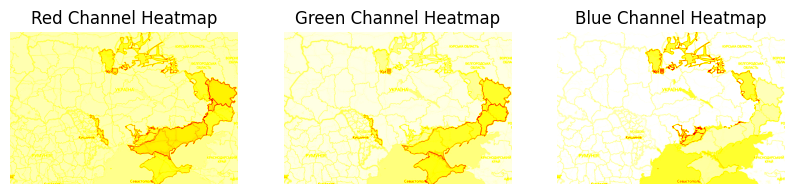

In [9]:
# Mostrar cada canal como un mapa de calor
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(r, cmap='hot')
plt.title('Red Channel Heatmap')
plt.axis('off')

plt.subplot(132)
plt.imshow(g, cmap='hot')
plt.title('Green Channel Heatmap')
plt.axis('off')

plt.subplot(133)
plt.imshow(b, cmap='hot')
plt.title('Blue Channel Heatmap')
plt.axis('off')

plt.show()


In [10]:
# FILTRO DE FALSOS COLORES

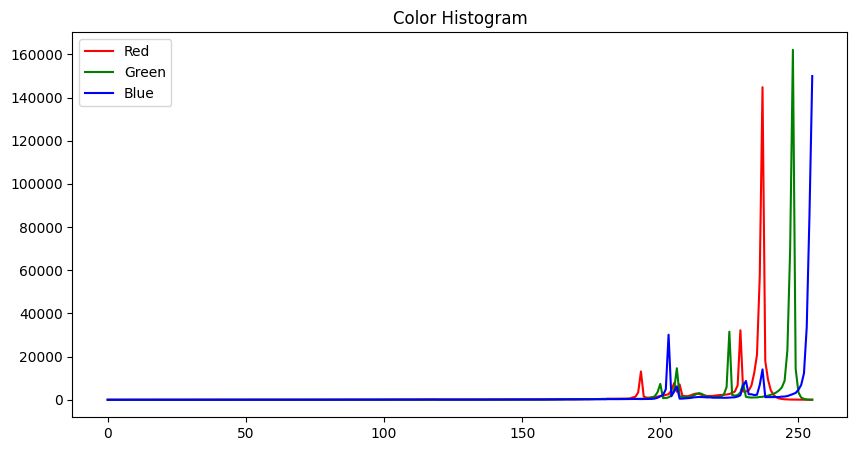

In [11]:
# Calcular los histogramas de cada canal
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Mostrar los histogramas
plt.figure(figsize=(10, 5))

plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')

plt.title('Color Histogram')
plt.legend()
plt.show()


In [12]:
img_cv = img_cv_cp

In [13]:
# Check if the image is in RGBA format
if img_cv.shape[2] == 4:
    # Convert the image to RGB format
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGBA2RGB)

/tmp/ipykernel_44522/2043506789.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  if r + g + b < 200 and b != max(r, g, b):


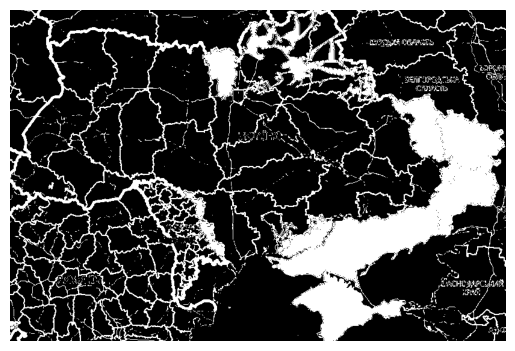

In [14]:
# Crear una máscara de la misma forma que la imagen original, inicialmente llena de ceros (negro)
mask_ = np.zeros_like(img_cv)

# Recorrer cada píxel de la imagen
for i in range(img_cv.shape[0]):
    for j in range(img_cv.shape[1]):
        # Obtener los valores RGB del píxel
        r, g, b = img_cv[i, j]

        # Comprobar si la suma de los valores RGB es menor que 760 y el valor azul no es el máximo
        if r + g + b < 200 and b != max(r, g, b):
            # Si se cumple la condición, establecer el píxel de la máscara a blanco
            mask_[i, j] = [255, 255, 255]
            
plt.imshow(mask_)
plt.axis('off')  # Optional: Turn off the axis labels
plt.show()

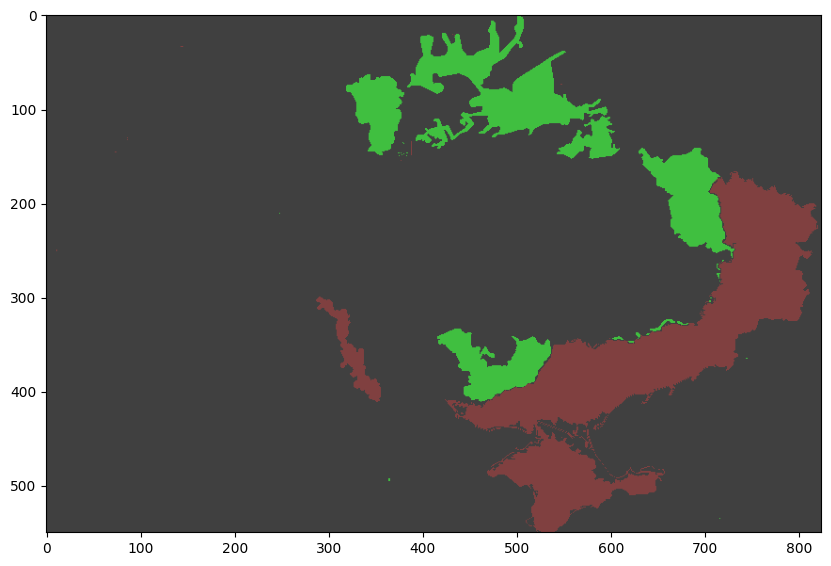

In [15]:
# Crear tres nuevas máscaras para cada color
mask_red = np.zeros_like(mask_)
mask_green = np.zeros_like(mask_)
mask_blue = np.zeros_like(mask_)

# Recorrer cada píxel de la máscara
for i in range(img_cv.shape[0]):
    for j in range(img_cv.shape[1]):
        # Obtener los valores RGB del píxel
        r, g, b = img_cv[i, j]

        # Comprobar cuál de los valores RGB es el máximo y establecer el píxel correspondiente en la máscara correspondiente
        if r > max(g,b) + 24 and b > 80:
            mask_red[i, j] = [255, 0, 0]
            # mask_red[i, j] = [255, 255, 255]
        elif g > max(r,b) + 15  :
            mask_green[i, j] = [0, 255, 0]
            # mask_green[i, j] = [255, 255, 255]
            
# Convertir las máscaras a escala de grises para encontrar contornos
mask_red_gray = cv2.cvtColor(mask_red, cv2.COLOR_BGR2GRAY)
mask_green_gray = cv2.cvtColor(mask_green, cv2.COLOR_BGR2GRAY)

# Encontrar contornos en las máscaras
contours_red, _ = cv2.findContours(mask_red_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_green, _ = cv2.findContours(mask_green_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Rellenar los contornos en las máscaras
mask_red = cv2.drawContours(mask_red, contours_red, -1, (255, 0, 0), thickness=cv2.FILLED)
mask_green = cv2.drawContours(mask_green, contours_green, -1, (0, 255, 0), thickness=cv2.FILLED)



# Plotear las máscaras superpuestas
plt.figure(figsize=(10, 10))

plt.imshow(mask_red, alpha=0.5)  # Rojo con 50% de transparencia
plt.imshow(mask_green, alpha=0.5)  # Verde con 50% de transparencia

plt.show()

In [16]:
# Count the number of pixels of each color
area_red = np.sum(mask_red)/255
area_green = np.sum(mask_green)/255
total = area_green + area_red
print('Area controlled by Force A (red):', (area_red/total)*100)
print('Area controlled by Force B (green):', (area_green/total)*100)

Area controlled by Force A (red): 61.83719193427931
Area controlled by Force B (green): 38.16280806572069
